### Analyzing the Stroop Effect


(1) What is the independent variable? What is the dependent variable?

The independent variable is <b>the test condition (congruent and incongruent)</b>. The dependent variable is <b>the time recorded</b>.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

<b>$H_{0}$ : There is no difference in population means between congruent and incongruent method.</b><br>
<br>
<b>$H_{a}$ : The population mean of incongruent menthod is higher than the population mean of congruent method.</b><br>
<br>
<b><i>$$ H_0 : \mu_c = \mu_i $$</b><br>
<b><i>$$ H_a : \mu_c < \mu_i $$</b><br>
<br>
$\mu_{c}$ is population mean of congruent time and $\mu_{i}$ is population mean of incongruent time.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [3]:
# Read dataset csv file

df = pd.read_csv("stroopdata.csv")

df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [4]:
# Compute descriptive statistics on the data including mean, standard deviation, min, max, median, Q1, and Q3.

df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [8]:
# check for missing values

df.isnull().sum()

Congruent      0
Incongruent    0
dtype: int64

In [23]:
# make column names in lowercase

df.columns = df.columns.str.lower()

df.head()

,congruent,incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

(array([4., 2., 4., 1., 6., 2., 2., 1., 1., 1.]),
 array([ 8.63  ,  9.9998, 11.3696, 12.7394, 14.1092, 15.479 , 16.8488,
        18.2186, 19.5884, 20.9582, 22.328 ]),
 <a list of 10 Patch objects>)

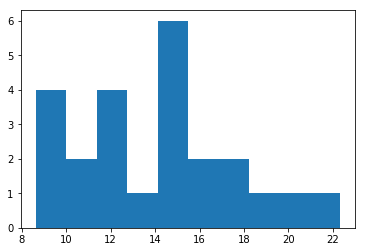

In [14]:
# Histogram for congruent data to see the distribution

plt.hist(df['congruent'])

The distribution for congruent is skewed to the right.

(array([4., 4., 6., 3., 4., 1., 0., 0., 0., 2.]),
 array([15.687 , 17.6438, 19.6006, 21.5574, 23.5142, 25.471 , 27.4278,
        29.3846, 31.3414, 33.2982, 35.255 ]),
 <a list of 10 Patch objects>)

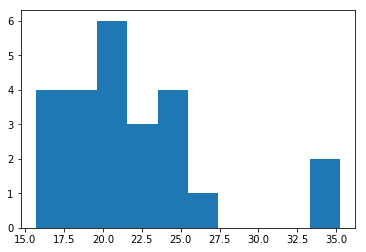

In [15]:
# Histogram for incongruent time to see the distribution

plt.hist(df['incongruent'])

There is some outliers in the dataset for incongurent. Thus, I will find those data and remove the row associated with the data to make the analysis more accurate.

In [24]:
# Find the outliers

df.query('incongruent > 27.5')

,congruent,incongruent
14,18.200,35.255
19,12.369,34.288


In [31]:
# Drop the rows associated with outliers

df = df.drop(df.index[[14,19]])

df

,congruent,incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


(array([1., 3., 2., 1., 4., 2., 2., 1., 3., 1.]),
 array([15.687 , 16.7465, 17.806 , 18.8655, 19.925 , 20.9845, 22.044 ,
        23.1035, 24.163 , 25.2225, 26.282 ]),
 <a list of 10 Patch objects>)

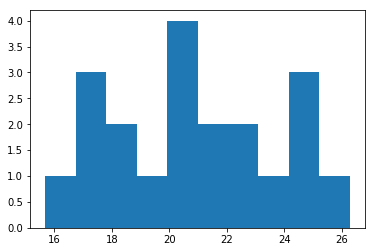

In [33]:
# Re-plot the histogram

plt.hist(df['incongruent'])

After dropping the outliers, the distribution plot changed and it seems more spread out.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

<b>I choose to use paired t-test because we want to analyze and compare between two different method of measurements on the same individuals. In this test, I will use a 95% confidence interval.</b><br>
<b>I assume that the dataset is approximately normally distributed.</b>

In [37]:
stats.ttest_rel(df['congruent'],df['incongruent'])

Ttest_relResult(statistic=-9.035272188275352, pvalue=2.6277541564328648e-08)

Based on paired t-test result, the t statistic is -9.035 and the p value is 2.63e-8. The p value is way smaller compared to the type I error of 0.05. <b>In conclusion, we reject the null hypotesis and there is a significant difference between congruent test method and incongruent test method</b>. This result is the same with expectation.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

# Source

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html <br>
<br>
http://www.statstutor.ac.uk/resources/uploaded/paired-t-test.pdf